In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

### Esercizio 12.1
Questa esercitazione ha come scopo di studiare due architetture diverse di rete neurale, Deep Neural Network e Convolutional Neural Network, nell'ambito della classificazione di immagini. 

La prima parte di questa esercitazione si è incentrata sulle reti neurali chiamte Deep Neural Network, nello specifico ci è stata fornita una rete in grado di classificare le immagini di numeri (in grado cioè di riconoscere i numeri) e abbiamo studiato come l'accurtezza delle classificazioni fatte dalla rete fosse legata alla scelta della funzione di ottimizzazione.

Abbiamo quindi costruito quattro reti neurali con diversa funzione di ottimizzazione e per ciascuna abbiamo mostrato in un grafico il valore della funzione di accuratezza al variare del numero di epoche sia in fase di training che in fase di validazione (il numero di epoche, il trainig set e il data set sono comuni a tutte le reti). Di seguito mostriamo il codice e i grafici. 

an example of a data point with label 4


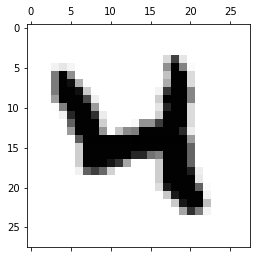

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!


In [5]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
#look at an example of data point
print('an example of a data point with label', Y_train[20])
#matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()
print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    return model

print('Model architecture created successfully!')

In [22]:
def compile_model_SGD():
    model=create_DNN()
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model
def compile_model_Adagrad():
    model=create_DNN()
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['accuracy'])
    return model
def compile_model_Adamax():
    model=create_DNN()
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=Adamax(),
                  metrics=['accuracy'])
    return model
def compile_model_Adam():
    model=create_DNN()
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model
print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [26]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_DNN = compile_model_SGD()
model_Adamax = compile_model_Adamax()
model_Adam = compile_model_Adam()
model_Adagrad = compile_model_Adagrad()

In [27]:
# train DNN and store training info in history
print('Model with SGD')
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
print('Model with Adamax')
history1 = model_Adamax.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
print('Model with Adam')
history2 = model_Adam.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
print('Model with Adagrad')
history3 = model_Adagrad.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

Model with SGD
Model with Adamax
Model with Adam
Model with Adagrad


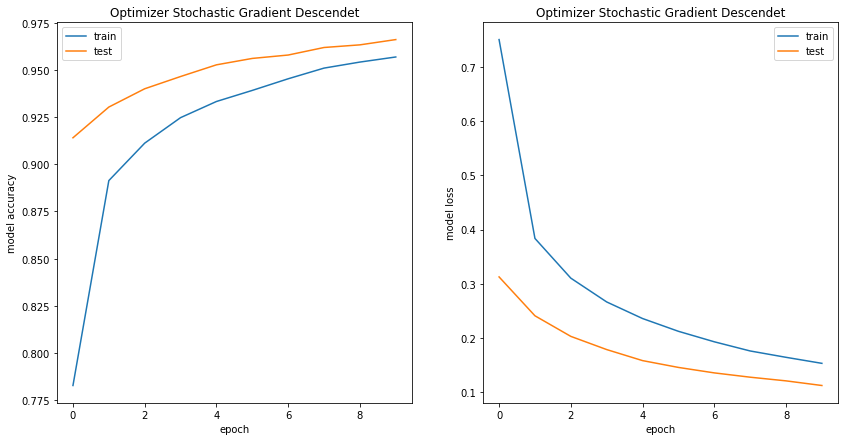

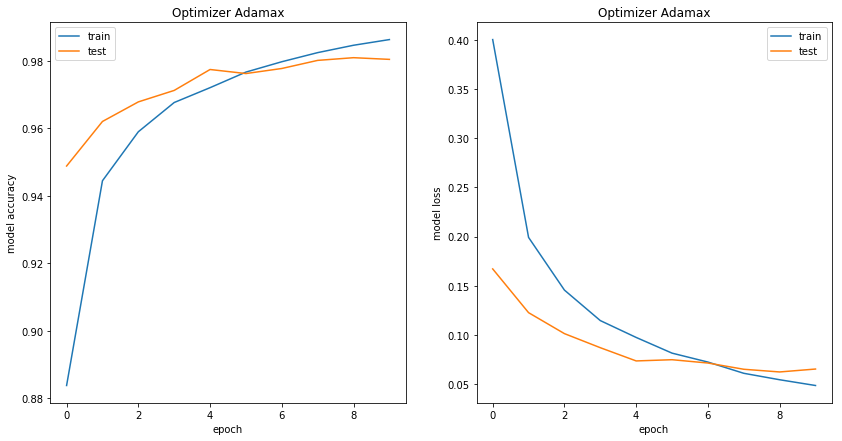

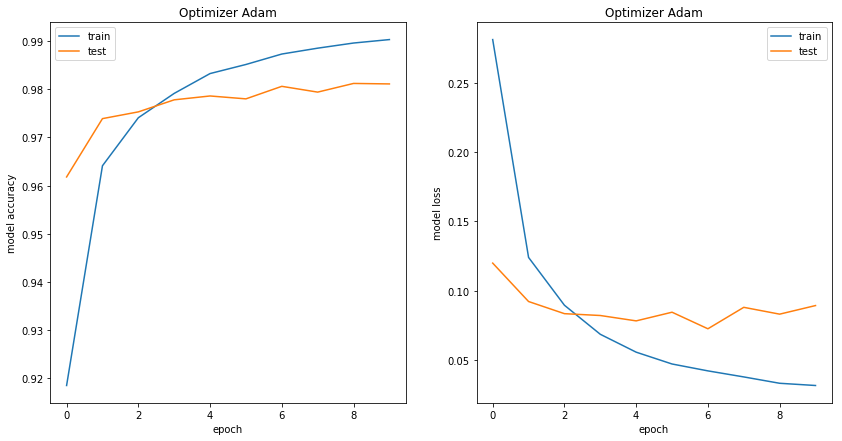

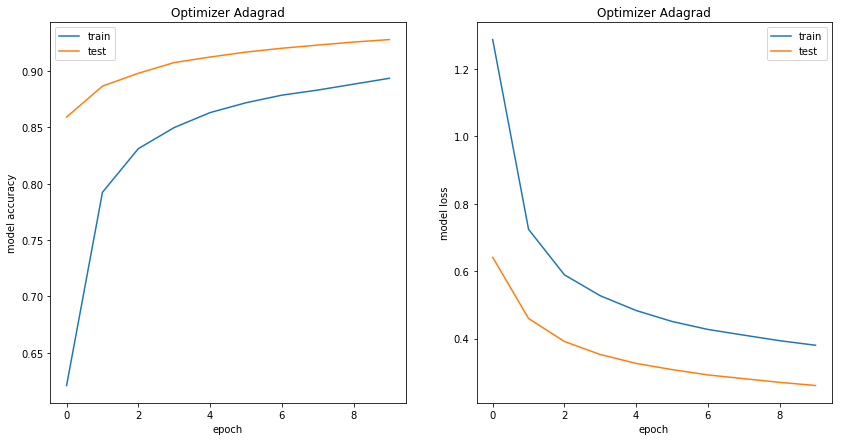

In [28]:
# summarize history for accuracy
plt.figure(figsize = (14, 7))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Optimizer Stochastic Gradient Descendet")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Optimizer Stochastic Gradient Descendet")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for accuracy
plt.figure(figsize = (14, 7))
plt.subplot(1,2,1)
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title("Optimizer Adamax")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("Optimizer Adamax")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# -_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
plt.figure(figsize = (14, 7))
plt.subplot(1,2,1)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title("Optimizer Adam")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(1,2,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Optimizer Adam")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# -_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
plt.figure(figsize = (14, 7))
plt.subplot(1,2,1)
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title("Optimizer Adagrad")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(1,2,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title("Optimizer Adagrad")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Notiamo che la rete che mostra i migliori risultati è la rete che ha come ottimizzatore lo stochastic gradient descendent.

## Exercise 12.2
Nella seconda parte di questa esercitazione abbiamo implementato la DNN aggiungendo dei layer di convoluzione per creare una CNN. In particolare abbiamo aggiunto due layer convoluzionali e due layer di pooling. Sono stati provati diverse combinazioni di parametri ed è stata selezionata la combinazione ottimale per il valore dell'accuratezza della classificazione.

Mostriamo di seguito la convolutional neural network e il grafico dell'accuracy in funzione delle epoche.

In [29]:
if tf.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print()
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)


X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples

X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)


In [30]:
def create_CNN():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')) 
    model.add(Conv2D(20, kernel_size=(4, 4), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(100, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])
    model.summary()
    return model
print('Model architecture created successfully!')

Model architecture created successfully!


In [31]:
batch_size = 32
epochs = 10

model_CNN=create_CNN()

historyCNN=model_CNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test, Y_test))

score = model_CNN.evaluate(X_test, Y_test, verbose=0)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 20)        3220      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7220)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 120)               866520    
_________________________________________________________________
dense_49 (Dense)             (None, 100)             

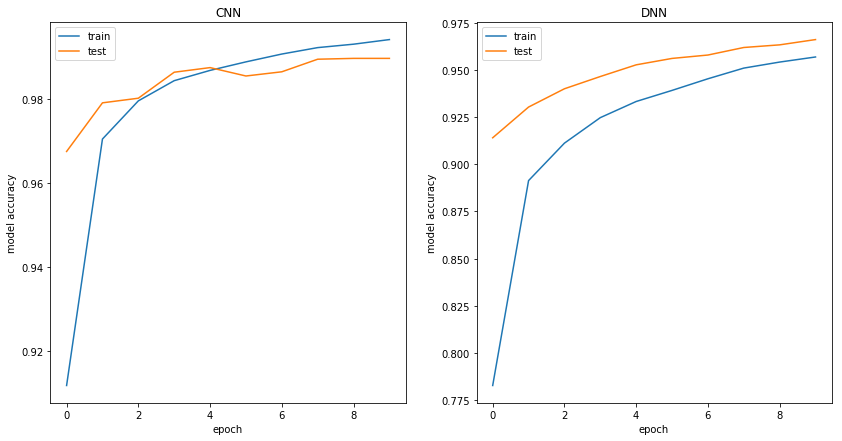

In [32]:
plt.figure(figsize = (14, 7))
plt.subplot(1,2,1)
plt.plot(historyCNN.history['acc'])
plt.plot(historyCNN.history['val_acc'])
plt.title("CNN")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("DNN")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Si può notare che il valore dell'accuratezza della classificazione della CNN è maggiore della classificazione della rete DNN. 

### Esercizio 12.3
Mostriamo di seguito come la Convolutional Neural Network che abbiamo costruito classifica dieci immagini della mia scrittura. 

In [33]:
digit=[]
for i in range(0,10):
    digit.append(i)

Image size: 28x28
(28, 28)
(1, 784)


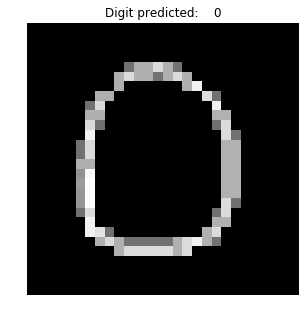

Image size: 28x28
(28, 28)
(1, 784)


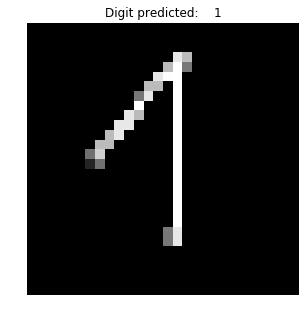

Image size: 28x28
(28, 28)
(1, 784)


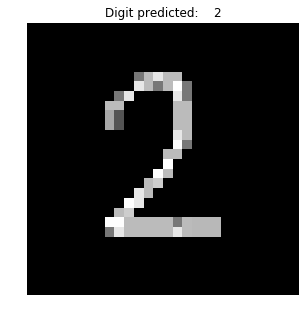

Image size: 28x28
(28, 28)
(1, 784)


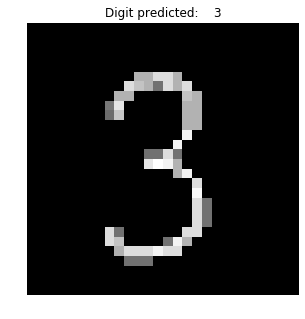

Image size: 28x28
(28, 28)
(1, 784)


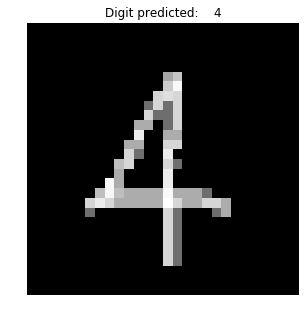

Image size: 28x28
(28, 28)
(1, 784)


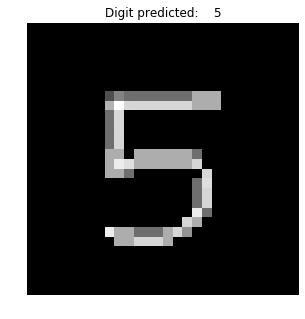

Image size: 28x28
(28, 28)
(1, 784)


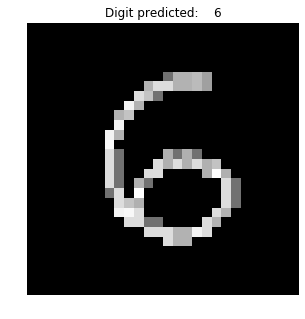

Image size: 28x28
(28, 28)
(1, 784)


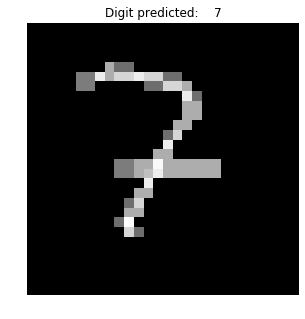

Image size: 28x28
(28, 28)
(1, 784)


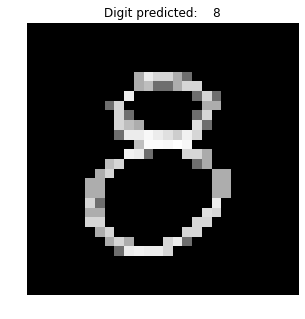

Image size: 28x28
(28, 28)
(1, 784)


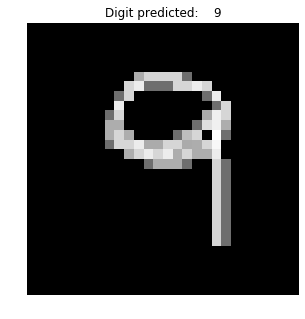

In [34]:
from PIL import Image
import os

for k in digit:
    digit_filename = "./"+str(k)+"_digit.png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    print(data.shape)
    
    data = data.reshape(1,xdim*ydim)
    print(data.shape)
    
    if tf.keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    pred_0 = model_CNN.predict(data)

    data = data.reshape(xdim,ydim)

    plt.figure(figsize=(5, 5))  
    plt.imshow(data, cmap='gray')    
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
    plt.show()